<a href="https://colab.research.google.com/github/paridaabhishek/Alpacatrade/blob/master/Alpeca_readWebSocket.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
import pandas as pd
from datetime import datetime

In [32]:
df = pd.read_csv('/content/drive/MyDrive/AAPL.csv',skiprows=3,index_col=False)

df.columns

Index(['b', 'AAPL', '172.9', '172.83', '172.93', '172.73', '139404',
       '2022-01-31T16:18:00Z', '1535', '172.824783'],
      dtype='object')

In [35]:
df.columns =['Message Type', 
             'Symbol', 
             'Open', 
             'Close',
             'High',
             'Low',
             'Volume',
             'TimeStamp',
             'n',
             'vw']

             

In [36]:
df


,Message Type,Symbol,Open,Close,High,Low,Volume,TimeStamp,n,vw
0,b,AAPL,172.82,172.8101,172.95,172.7000,131099,2022-01-31T16:19:00Z,1615,172.819059
1,b,AAPL,172.82,172.8500,172.98,172.8100,177425,2022-01-31T16:20:00Z,1987,172.887658
2,b,AAPL,172.82,172.8500,172.98,172.8100,177426,2022-01-31T16:20:00Z,1988,172.887658
3,b,AAPL,172.85,172.7998,173.00,172.7998,146230,2022-01-31T16:21:00Z,1756,172.895073
4,b,AAPL,172.79,172.6200,172.79,172.5000,266468,2022-01-31T16:22:00Z,2706,172.613082
...,...,...,...,...,...,...,...,...,...,...
412,b,AAPL,174.33,174.3400,174.34,174.3000,1514,2022-01-31T21:56:00Z,30,174.318900
413,b,AAPL,174.34,174.3400,174.34,174.3200,2031,2022-01-31T21:57:00Z,47,174.335862
414,b,AAPL,174.35,174.3500,174.35,174.3500,515,2022-01-31T21:59:00Z,24,174.336806
415,b,AAPL,174.35,174.3400,174.35,174.3400,1228,2022-01-31T22:00:00Z,22,174.350094


In [37]:
df_unique=df.drop_duplicates(subset=['TimeStamp']).copy()


In [44]:
df_unique.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 341 entries, 0 to 416
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Message Type  341 non-null    object        
 1   Symbol        341 non-null    object        
 2   Open          341 non-null    float64       
 3   Close         341 non-null    float64       
 4   High          341 non-null    float64       
 5   Low           341 non-null    float64       
 6   Volume        341 non-null    int64         
 7   TimeStamp     341 non-null    datetime64[ns]
 8   n             341 non-null    int64         
 9   vw            341 non-null    float64       
dtypes: datetime64[ns](1), float64(5), int64(2), object(2)
memory usage: 39.3+ KB


In [84]:
import pandas as pd
pd.options.mode.chained_assignment = None

In [40]:
df_unique.loc[:,'TimeStamp'] = pd.to_datetime(df_unique['TimeStamp'],format='%Y-%m-%dT%H:%M:%SZ')

In [60]:
df_unique.head(10)

,Message Type,Symbol,Open,Close,High,Low,Volume,n,vw,14minEMAonOpen
TimeStamp,,,,,,,,,,
2022-01-31 16:19:00,b,AAPL,172.82,172.8101,172.9500,172.7000,131099,1615,172.819059,172.820000
2022-01-31 16:20:00,b,AAPL,172.82,172.8500,172.9800,172.8100,177425,1987,172.887658,172.820000
2022-01-31 16:21:00,b,AAPL,172.85,172.7998,173.0000,172.7998,146230,1756,172.895073,172.831460
2022-01-31 16:22:00,b,AAPL,172.79,172.6200,172.7900,172.5000,266468,2706,172.613082,172.818776
2022-01-31 16:23:00,b,AAPL,172.63,172.5674,172.6650,172.5200,127973,1493,172.601534,172.769525
2022-01-31 16:24:00,b,AAPL,172.57,172.5450,172.6100,172.5000,138431,1464,172.534428,172.723358
2022-01-31 16:25:00,b,AAPL,172.54,172.5299,172.7050,172.5100,156433,1755,172.614057,172.684721
2022-01-31 16:26:00,b,AAPL,172.53,172.6150,172.6800,172.5242,154183,1732,172.615402,172.654460
2022-01-31 16:27:00,b,AAPL,172.61,172.6101,172.7000,172.5501,168806,1881,172.628971,172.646274


In [ ]:
df_unique.set_index('TimeStamp',inplace=True)

In [73]:
df_unique['14minEMAonOpen'] = df_unique['Close'].ewm(span=14,adjust=True).mean()

In [53]:
import matplotlib.pyplot as plt

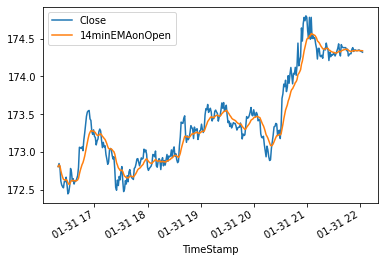

In [81]:
df_unique[['Close','14minEMAonOpen']].plot()

In [92]:
df_unique['Gap'] = df_unique['Close']-df_unique['14minEMAonOpen']



In [95]:
 df_unique['NextMinClosePrice'] =df_unique['Close'].shift(periods=-1)

In [98]:
 df_unique['NetGainInMinute'] =df_unique['NextMinClosePrice']-df_unique['Close']

In [96]:
df_unique[['Close','NextMinClosePrice','14minEMAonOpen','Gap']]

,Close,NextMinClosePrice,14minEMAonOpen,Gap
TimeStamp,,,,
2022-01-31 16:19:00,172.8101,172.8500,172.810100,0.000000
2022-01-31 16:20:00,172.8500,172.7998,172.831475,0.018525
2022-01-31 16:21:00,172.7998,172.6200,172.819375,-0.019575
2022-01-31 16:22:00,172.6200,172.5674,172.758381,-0.138381
2022-01-31 16:23:00,172.5674,172.5450,172.708554,-0.141154
...,...,...,...,...
2022-01-31 21:56:00,174.3400,174.3400,174.340800,-0.000800
2022-01-31 21:57:00,174.3400,174.3500,174.340693,-0.000693
2022-01-31 21:59:00,174.3500,174.3400,174.341934,0.008066


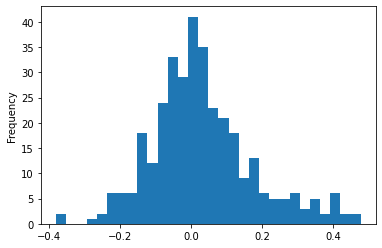

In [84]:
df_unique['Gap'].plot.hist(bins =30)

In [109]:
df_unique[df_unique['Gap']<0][['Close','NextMinClosePrice','14minEMAonOpen','Gap','NetGainInMinute']].count()

Close                158
NextMinClosePrice    157
14minEMAonOpen       158
Gap                  158
NetGainInMinute      157
dtype: int64

In [110]:
df_unique[df_unique['Gap']<0][['Close','NextMinClosePrice','14minEMAonOpen','Gap','NetGainInMinute']]['NetGainInMinute'].sum()

2.3140999999998826